In [5]:
import numpy as np

def head_to_head(a_soldiers,b_soldiers):
    """
    Calculate the score for a battle between the a and b soldier
    arrangements. 
    """
    
    points = np.arange(1,11)
    
    a = np.array(a_soldiers)
    b = np.array(b_soldiers)
    
    a_points = np.sum(points[np.array(a > b)])
    b_points = np.sum(points[np.array(a < b)])
    
    if a_points > b_points:
        return a_soldiers
    elif a_points < b_points:
        return b_soldiers
    else:
        return None

    
def gen_armies(army_type=None):
    """
    Randomly generate armies by a variety of strategies.  
    """
    
    # Generate initial weights
    if army_type == "exp":
        armies = np.exp(np.random.random()*np.arange(10))
    elif army_type == "flat":
        armies = np.random.rand(10)
    elif army_type == "flat_sorted":
        armies = np.random.rand(10)
        armies.sort()
    elif army_type == "comb":
        armies = np.sin(np.arange(10)/np.random.random()) + 1        
    else:
        armies = np.ones(10)
    
    # round off so armies now have 100 soldiers, distributed 
    # according to weights above
    armies = armies/np.sum(armies)        
    armies = np.round(armies*100,0)
    
    # Trim to deal with numerical errors in round call above
    if np.sum(armies) > 100:
        armies[9] = armies[9] - (np.sum(armies) - 100)
    if np.sum(armies) < 100:
        armies[9] = armies[9] + (100 - np.sum(armies))
        
    return np.array(armies,dtype=np.int)

strategies = ["exp","flat","flat_sorted","comb"]

# Create initial winner
winner_strategy = np.random.choice(strategies)
winner = gen_armies(winner_strategy)

# Run 1,000,000 times 
out = {}
for i in range(1000000):
    
    # Create a challenger
    challenger_strategy = np.random.choice(strategies)
    challenger = gen_armies(challenger_strategy)

    # Do battle
    result = head_to_head(winner,challenger)
    
    # Replace winner if there is a new winner
    if result != None:
        if not np.array_equal(winner,result):
            winner = np.copy(result)
            winner_strategy = challenger_strategy
    
    # Count the winners
    try:
        out[tuple(winner)] += 1
    except KeyError:
        out[tuple(winner)] = 1


# Sort output and print out top 50 most common solutions
sorted_out = [(out[k],k) for k in out.keys()]
sorted_out.sort(reverse=True)
for i in range(50):
    print(sorted_out[i][0]/1000000,sorted_out[i][1])

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:74: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


0.012411 (2, 3, 4, 5, 7, 9, 11, 15, 19, 25)
0.007162 (2, 2, 3, 4, 6, 8, 11, 15, 21, 28)
0.006031 (2, 3, 4, 5, 6, 8, 11, 15, 20, 26)
0.005267 (3, 4, 5, 6, 7, 9, 11, 14, 18, 23)
0.005069 (3, 3, 4, 5, 7, 9, 11, 15, 19, 24)
0.004094 (1, 2, 3, 4, 5, 8, 11, 15, 21, 30)
0.00358 (2, 3, 3, 5, 6, 8, 11, 15, 20, 27)
0.003239 (2, 2, 3, 4, 6, 8, 11, 15, 20, 29)
0.00275 (3, 4, 5, 6, 8, 9, 12, 14, 17, 22)
0.002595 (2, 3, 4, 5, 6, 9, 11, 15, 20, 25)
0.002569 (4, 5, 6, 7, 8, 10, 11, 14, 16, 19)
0.002388 (1, 2, 3, 4, 5, 7, 11, 15, 22, 30)
0.002292 (1, 2, 3, 4, 6, 8, 11, 15, 21, 29)
0.002205 (1, 1, 2, 3, 4, 6, 10, 15, 23, 35)
0.001828 (1, 2, 2, 3, 5, 7, 10, 15, 22, 33)
0.001821 (4, 4, 5, 6, 8, 9, 12, 14, 17, 21)
0.001524 (3, 3, 4, 6, 7, 9, 11, 15, 18, 24)
0.001485 (1, 1, 2, 3, 4, 7, 10, 15, 23, 34)
0.001256 (1, 1, 2, 3, 5, 7, 10, 15, 22, 34)
0.001249 (1, 1, 1, 2, 4, 6, 9, 15, 24, 37)
0.001233 (5, 6, 7, 8, 9, 10, 11, 13, 15, 16)
0.001211 (1, 2, 2, 4, 5, 7, 11, 15, 22, 31)
0.001157 (11, 5, 1, 0, 2, 7, 13, 

In [ ]:
battle_plan = [2, 3, 4, 5, 7, 9, 11, 15, 19, 25]

In [4]:
import random
import itertools

def simulate(coin_positions):
    """
    Simulate playing the game.  Roll a fair dice until you either
    land on a coin in coin_positions (alive, return 1) or pass 
    all of the coins (dead, return 0).
    """
    
    # current position
    current = 0
    
    # Roll until you pass the last coin
    while current < coin_positions[-1]:
        current = current + random.choice([1,2,3,4,5,6])
        
        # If you've landed on a coin, you win -- return 1
        if current in coin_positions:
            return 1
        
    return 0
            
# Iterate over all possible 3-coin placements
possibilities = []
for c in itertools.combinations(list(range(1,10)),3):
    
    # Simulate rolling the dice 100,000 times for that placement,
    # recording the number of times you did not die as "score"
    score = 0
    for i in range(100000):
        score = score + simulate(c)
        
    # Record the result as a tuple (score,coin_arrangement)
    possibilities.append((score,c))

# Sort the results with the highest score first
possibilities.sort(reverse=True)

# Print the top 10
print(possibilities[:10])

[(79321, (4, 5, 6)), (75883, (5, 6, 7)), (75505, (3, 5, 6)), (72296, (2, 5, 6)), (71727, (3, 4, 6)), (71555, (4, 6, 7)), (69449, (1, 5, 6)), (68340, (2, 4, 6)), (68075, (3, 4, 5)), (67653, (3, 6, 7))]


In [ ]:
coin_placement = [4,5,6]

LANDED: Glad that's over.


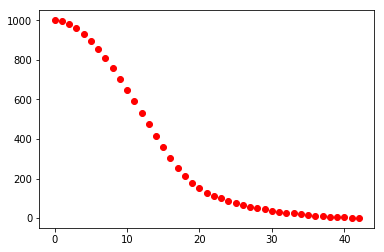

In [10]:
import rocket

%matplotlib inline
from matplotlib import pyplot as plt

R = rocket.Rocket()
while R.alive and not R.landed:
    
    # High altitude regime
    if R.position[1] > 100:
        R.y_thruster = (2-R.velocity[1])
    else:
        R.y_thruster = (0.5-R.velocity[1])

    plt.plot(R.time,R.position[1],'ro')
        
    R.update()
    


    

LANDED: Glad that's over.


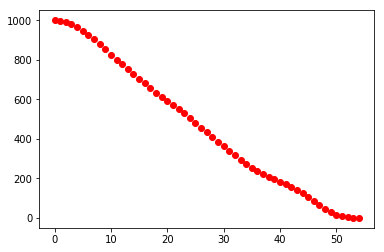

In [11]:

R = rocket.Rocket()
while R.alive and not R.landed:
    
    R.y_thruster = 100
    if R.position[1] < 800:
        R.y_thruster = 30

    if R.position[1] < 700:
        R.y_thruster = 25
    
    if R.position[1] < 600:
        R.y_thruster = 12.
    
    if R.position[1] < 500:
        R.y_thruster = 10.
    
    if R.position[1] < 400:
        R.y_thruster = 6.
    
    if R.position[1] < 250:
        R.y_thruster = 3.
    
    if R.position[1] < 180:
        R.y_thruster = 1.5
    
    if R.position[1] < 10:
        R.y_thruster = .9
        
    if R.position[1] < 2:
        R.y_thruster = 0.6
    
    plt.plot(R.time,R.position[1],'ro')
    
    R.update()
    
    
    